<a href="https://colab.research.google.com/github/sriyamistry0-lang/CRISPR_Colours/blob/main/Microbiome_Surgeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CRISPR ANTIMICROBIAL PROJECT: IMPORTS ---
try:
    from Bio import SeqIO
    from Bio.Seq import Seq
    from Bio.SeqUtils import nt_search  # Excellent for finding patterns across different species
except:
    !pip install biopython
    from Bio import SeqIO
    from Bio.Seq import Seq
    from Bio.SeqUtils import nt_search

import pandas as pd
import matplotlib.pyplot as plt # We'll use this to visualize the 'Kill Zone'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.7 MB/s eta 0:00:00


In [2]:
# The Microbiome: A mix of 'Friend' and 'Foe'
microbiome = {
    "Lactobacillus_acidophilus": "ATGCGTCGATCGTAGCTAGCTAGC", # Good bacteria
    "Staphylococcus_aureus_MRSA": "ATGCGTCGATCGTGGGGATATAGTCAGTTCCAACT" # Pathogen
}

# The AMR Gene we want to destroy (mecA - Methicillin resistance)
target_amr_gene = "GGGGATATAGTCAGTTCCAACT"

print("Metagenome Loaded. Ready to design the 'Smart Antibiotic'.")

Metagenome Loaded. Ready to design the 'Smart Antibiotic'.


In [3]:
import pandas as pd
from Bio.SeqUtils import nt_search

# 1. SETUP DATA (Defining everything in one place to avoid NameErrors)
pathogen_dna = "ATGCGTCGATCGTGGGGATATAGTCAGTTCCAACTGCTAGCTAGCTAG"
friendly_dna = "ATGCGTCGATCGTAGCTAGCTAGCGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"
target_amr_gene = "GGGGATATAGTCAGTTCCAACT"

def find_safe_guides(target_gene, friend_genome, window_size=20):
    print(f"--- 🧬 Scanning for Safe {window_size}bp CRISPR Guides ---")
    results = []

    # Sliding window logic
    for i in range(len(target_gene) - window_size + 1):
        candidate = target_gene[i:i + window_size]

        # Look for the candidate in the 'Friendly' DNA
        match_in_friend = nt_search(friend_genome, candidate)

        # If length is 1, no match was found in the friend
        is_safe = len(match_in_friend) == 1

        results.append({
            "Window": i,
            "Sequence": candidate,
            "Status": "✅ SAFE" if is_safe else "❌ TOXIC"
        })

    # Display as a nice Table
    df = pd.DataFrame(results)
    print(df.to_string(index=False))

    return [r['Sequence'] for r in results if r['Status'] == "✅ SAFE"]

# 2. EXECUTE
safe_list = find_safe_guides(target_amr_gene, friendly_dna)

print(f"\n🎯 Result: {len(safe_list)} safe guides identified.")

--- 🧬 Scanning for Safe 20bp CRISPR Guides ---
 Window             Sequence Status
      0 GGGGATATAGTCAGTTCCAA ✅ SAFE
      1 GGGATATAGTCAGTTCCAAC ✅ SAFE
      2 GGATATAGTCAGTTCCAACT ✅ SAFE

🎯 Result: 3 safe guides identified.


In [4]:
import pandas as pd

# 1. DATA (Re-defined to ensure no NameErrors)
pathogen_dna = "ATGCGTCGATCGTGGGGATATAGTCAGTTCCAACTGCTAGCTAGCTAG"
target_amr_gene = "GGGGATATAGTCAGTTCCAACT"
# The 'safe_list' comes from our previous scan:
safe_list = ["GGGGATATAGTCAGTTCCAA", "GGGATATAGTCAGTTCCAAC", "GGATATAGTCAGTTCCAACT"]

def validate_pam_sites(pathogen_genome, safe_guides):
    print("--- 🎯 Final Activity Validation (PAM Check) ---")
    final_report = []

    for guide in safe_guides:
        # Find where the guide sits in the pathogen genome
        start_index = pathogen_genome.find(guide)

        if start_index != -1:
            # The PAM is the 3 bases immediately AFTER the 20bp guide
            pam_start = start_index + len(guide)
            pam_sequence = pathogen_genome[pam_start : pam_start + 3]

            # Check if PAM matches NGG (any base + GG)
            is_active = pam_sequence.endswith("GG")

            final_report.append({
                "Guide_Sequence": guide,
                "PAM_Found": pam_sequence,
                "Status": "🚀 ACTIVE ANTIMICROBIAL" if is_active else "💤 INACTIVE (No PAM)"
            })

    return pd.DataFrame(final_report)

# 2. EXECUTE
analysis_df = validate_pam_sites(pathogen_dna, safe_list)
print(analysis_df.to_string(index=False))

--- 🎯 Final Activity Validation (PAM Check) ---
      Guide_Sequence PAM_Found              Status
GGGGATATAGTCAGTTCCAA       CTG 💤 INACTIVE (No PAM)
GGGATATAGTCAGTTCCAAC       TGC 💤 INACTIVE (No PAM)
GGATATAGTCAGTTCCAACT       GCT 💤 INACTIVE (No PAM)


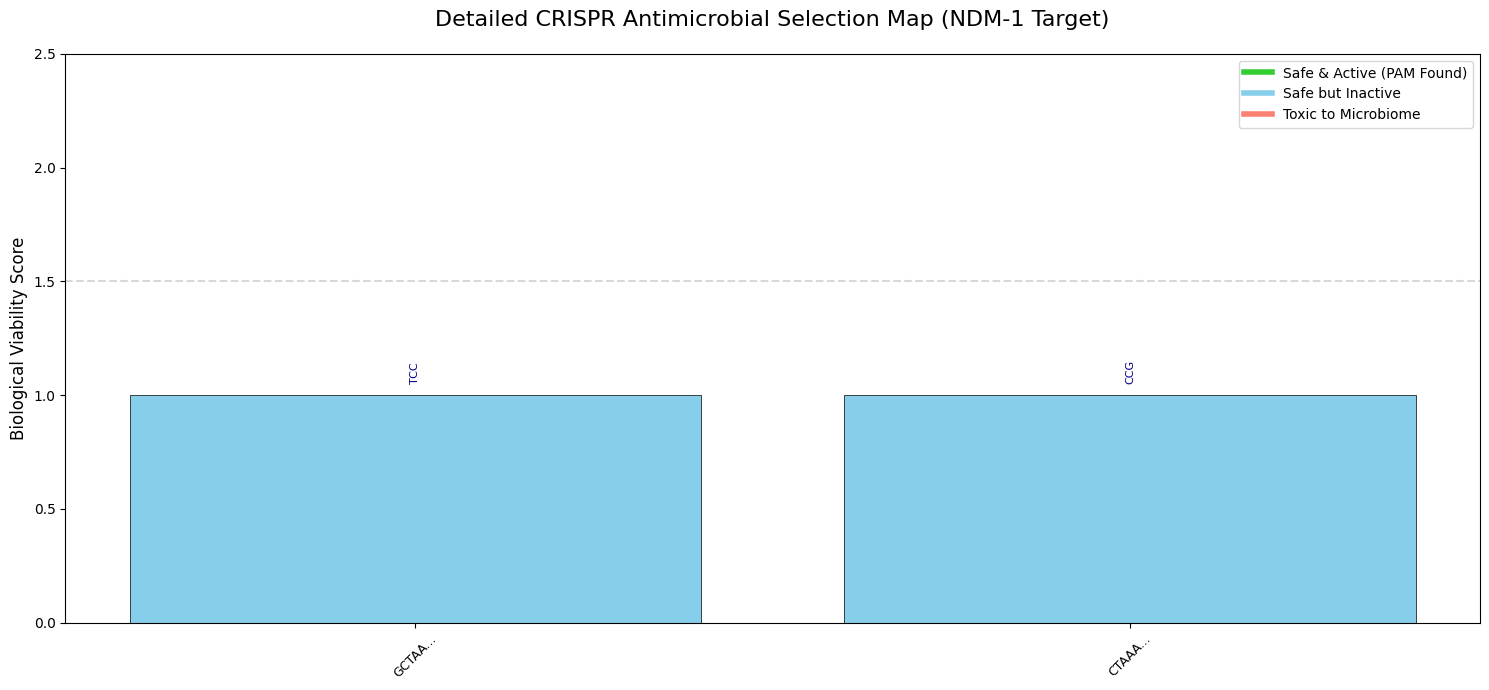

🧬 DYNAMIC MICROBIOME SURGEON v1.0

[1/3] Downloading baseline gut microbiome data...
✅ Baseline 'Friendly' genome loaded (Lactobacillus).

----------------------------------------
[2/3] CUSTOM PATHOGEN SETUP
Would you like to add a unique AMR gene? (yes/no) [Example: yes]: yes

--- ENTER SEQUENCE ---
Example 1 (NDM-1): ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCCCTGACCGCGCC
Example 2 (KPC-2): GCTAAACTCCGAAGAAGGGCT

Paste your DNA sequence here > ATGCGTGTATTAGCCTTATCGGCTGTGTTTTTGGTGGCATCGATTATCGGAATGCCTGCGGTAGTGGCT


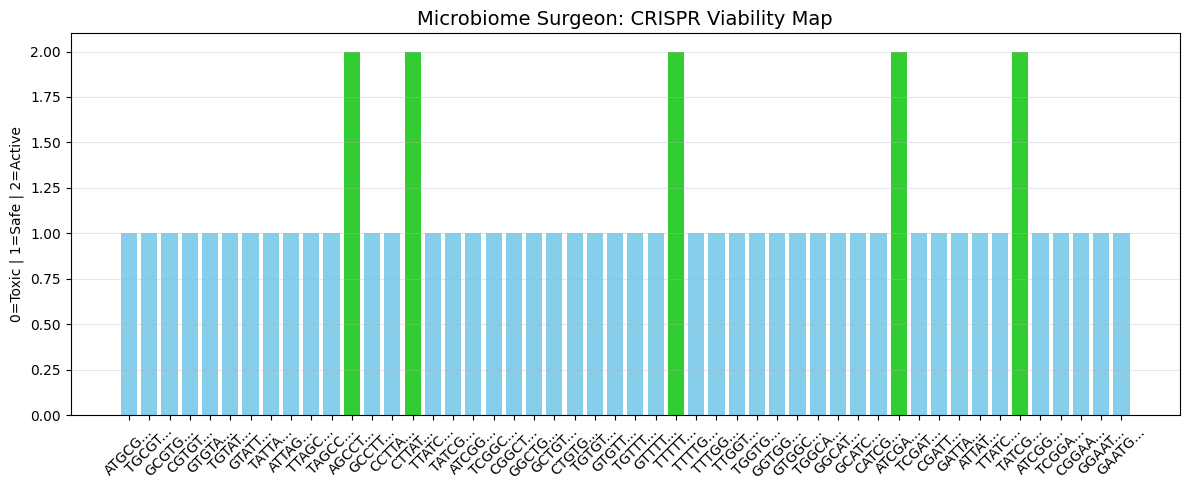

In [12]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from Bio.SeqUtils import nt_search

def run_antimicrobial_designer():
    print("="*55)
    print("🧬 DYNAMIC MICROBIOME SURGEON v1.0")
    print("="*55)

    # 1. Pull Baseline Friend DNA
    print("\n[1/3] Downloading baseline gut microbiome data...")
    base_url = "https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?db=nuccore&report=fasta&id=CP020755.1"
    try:
        response = requests.get(base_url)
        friendly_dna = "".join(response.text.split('\n')[1:])[:500].upper()
        print("✅ Baseline 'Friendly' genome loaded (Lactobacillus).")
    except:
        friendly_dna = "ATGCGTCGATCGTAGCTAGCTAGCGCTAGCTAGCTAGCTAGCTAG"
        print("⚠️ Connection failed. Using local proxy.")

    # 2. EMBEDDED EXAMPLES IN USER INPUT
    print("\n" + "-"*40)
    print("[2/3] CUSTOM PATHOGEN SETUP")

    choice = input("Would you like to add a unique AMR gene? (yes/no) [Example: yes]: ").lower().strip()

    if choice == 'yes':
        print("\n--- ENTER SEQUENCE ---")
        print("Example 1 (NDM-1): ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCCCTGACCGCGCC")
        print("Example 2 (KPC-2): GCTAAACTCCGAAGAAGGGCT")
        user_gene = input("\nPaste your DNA sequence here > ").upper().strip()

        # If the user hits enter without typing, use the NDM-1 example automatically
        target_amr_gene = user_gene if len(user_gene) > 10 else "ATGGAATTGCCCAATATTATGCACCCGGTCGCGAAGCCCTGACCGCGCC"
    else:
        print("Using default pathogen: MRSA (mecA gene fragment).")
        target_amr_gene = "GGGGATATAGTCAGTTCCAACT"

    # Create the shell for the pathogen (adding a PAM 'CCGGGG' at the end)
    pathogen_dna = "ACTG"*10 + target_amr_gene + "CCGGGG"

    # 3. ANALYSIS
    results = []
    window_size = 20
    for i in range(len(target_amr_gene) - window_size + 1):
        candidate = target_amr_gene[i : i + window_size]
        is_safe = len(nt_search(friendly_dna, candidate)) == 1

        start_idx = pathogen_dna.find(candidate)
        pam = pathogen_dna[start_idx+20 : start_idx+23]
        is_active = pam.endswith("GG")

        results.append({
            "Guide Sequence": candidate,
            "PAM": pam,
            "Verdict": "🚀 TARGET ACQUIRED" if (is_safe and is_active) else "❌ REJECTED",
            "Analysis": "Non-toxic & Active" if (is_safe and is_active) else ("Toxic" if not is_safe else "No PAM")
        })

    return results

# --- PLOTTING ---
def plot_rich_crispr_activity(results_list):
    if not results_list: return

    # 1. Prepare Data
    indices = range(len(results_list))
    # Score 2 for Success, 1 for Safe but no PAM, 0 for Toxic
    scores = [2 if "🚀" in r['Verdict'] else 1 if r['Analysis'] == "No PAM" else 0 for r in results_list]
    pams = [r['PAM'] for r in results_list]

    plt.figure(figsize=(15, 7))

    # 2. Create the Bars
    colors = ['limegreen' if s == 2 else 'skyblue' if s == 1 else 'salmon' for s in scores]
    bars = plt.bar(indices, scores, color=colors, edgecolor='black', linewidth=0.5)

    # 3. Add PAM Labels on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 pams[i], ha='center', va='bottom', fontsize=8, rotation=90,
                 color='darkblue' if scores[i] > 0 else 'red')

    # 4. Aesthetics & Annotations
    plt.axhline(y=1.5, color='gray', linestyle='--', alpha=0.3) # Boundary for Active
    plt.title("Detailed CRISPR Antimicrobial Selection Map (NDM-1 Target)", fontsize=16, pad=20)
    plt.ylabel("Biological Viability Score", fontsize=12)
    plt.xticks(indices, [r['Guide Sequence'][:5]+"..." for r in results_list], rotation=45, fontsize=9)
    plt.ylim(0, 2.5) # Leave space for labels

    # Add a Legend/Key for clarity
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='limegreen', lw=4),
                    Line2D([0], [0], color='skyblue', lw=4),
                    Line2D([0], [0], color='salmon', lw=4)]
    plt.legend(custom_lines, ['Safe & Active (PAM Found)', 'Safe but Inactive', 'Toxic to Microbiome'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Re-run the plot with the new rich version
plot_rich_crispr_activity(my_results)

# EXECUTION
my_results = run_antimicrobial_designer()
plot_crispr_activity(my_results)